In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

# CSV file load karo
df = pd.read_csv("student_feedback.csv")  # <- apna file name daalo
print(f"✅ Dataset loaded with {len(df)} student responses")
df.head()


✅ Dataset loaded with 1001 student responses


,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [3]:
# Student ID hata ke parameters ka list banao
parameter_cols = [col for col in df.columns if col.lower() != 'student id']

# Missing values check & fill
if df.isnull().sum().sum() > 0:
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].median(), inplace=True)

print("✅ Missing values handled")


✅ Missing values handled


In [5]:
desc_stats = df[parameter_cols].describe().T
desc_stats[['mean', '50%', 'min', 'max', 'std']].round(2)


,mean,50%,min,max,std
Well versed with the subject,7.50,8.0,5.0,10.0,1.69
Explains concepts in an understandable way,6.08,6.0,2.0,10.0,2.60
Use of presentations,5.94,6.0,4.0,8.0,1.42
Degree of difficulty of assignments,5.43,5.0,1.0,10.0,2.87
Solves doubts willingly,5.47,6.0,1.0,10.0,2.87
Structuring of the course,5.64,6.0,1.0,10.0,2.92
Provides support for students going above and beyond,5.66,6.0,1.0,10.0,2.89
Course recommendation based on relevance,5.60,6.0,1.0,10.0,2.89


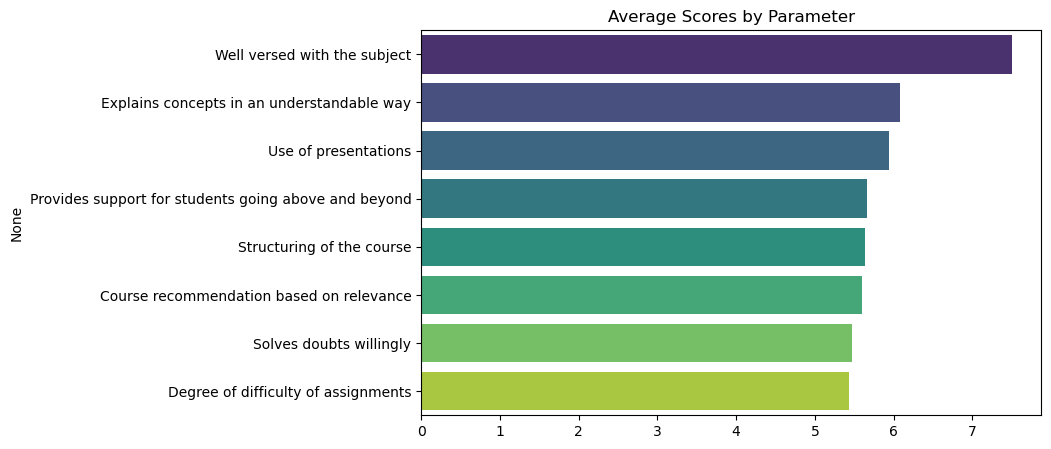

In [16]:
#avg_scores = df[parameter_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Scores by Parameter")
plt.show()


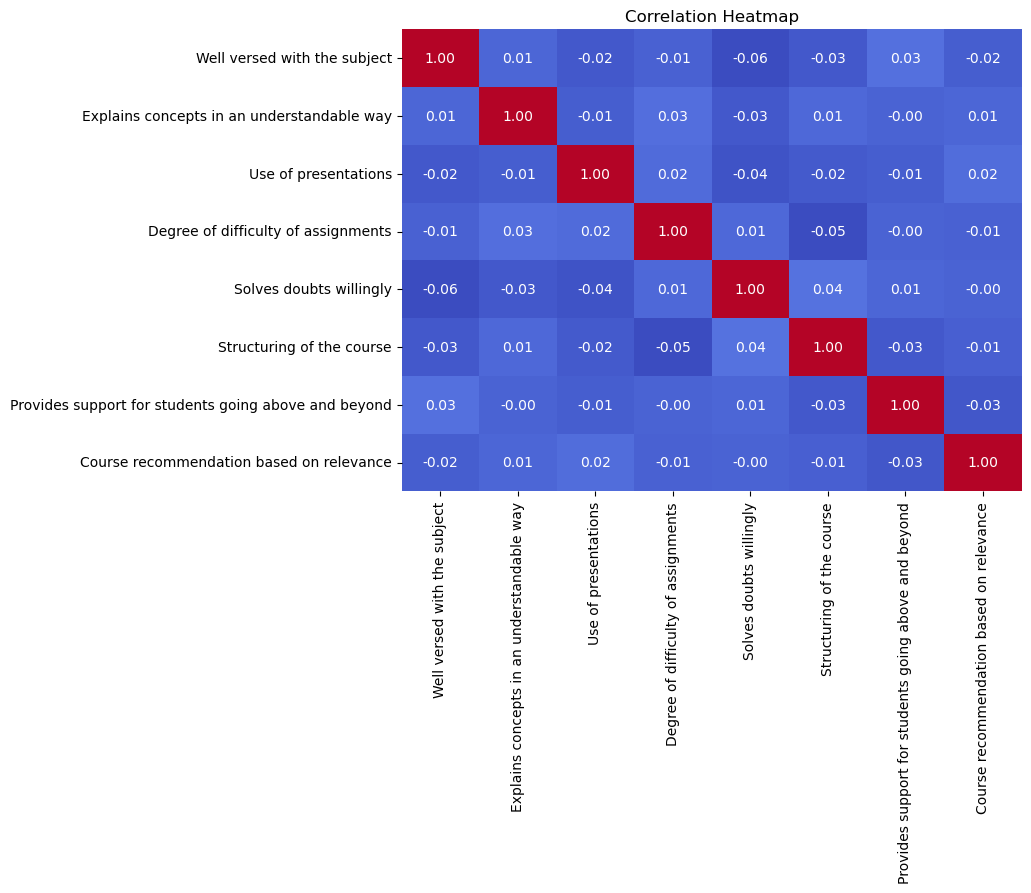

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[parameter_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=False)
plt.title("Correlation Heatmap")
plt.show()


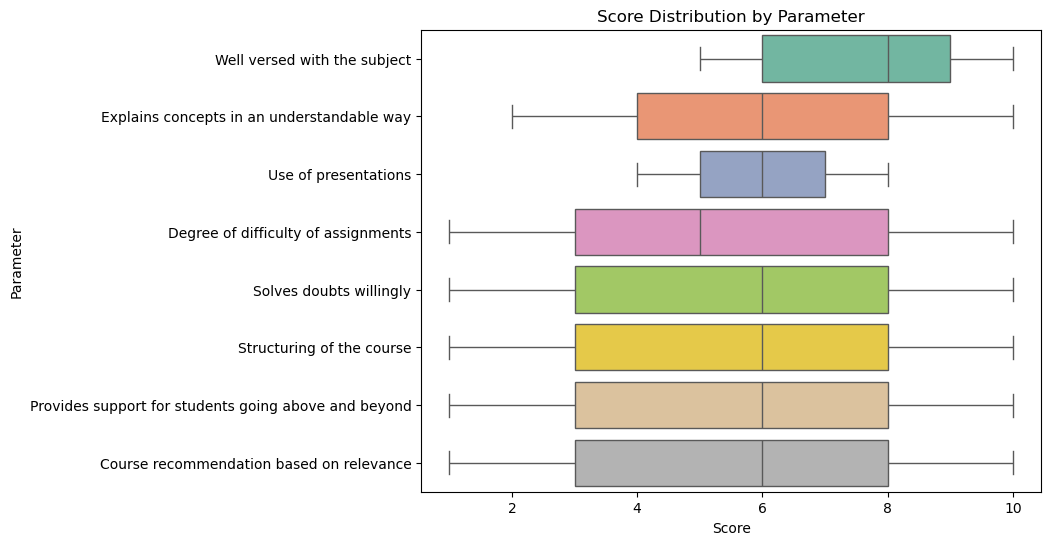

In [20]:
df_melt = df[parameter_cols].melt(var_name="Parameter", value_name="Score")

plt.figure(figsize=(8, 6))
sns.boxplot(x="Score", y="Parameter", data=df_melt, palette="Set2")
plt.title("Score Distribution by Parameter")
plt.show()


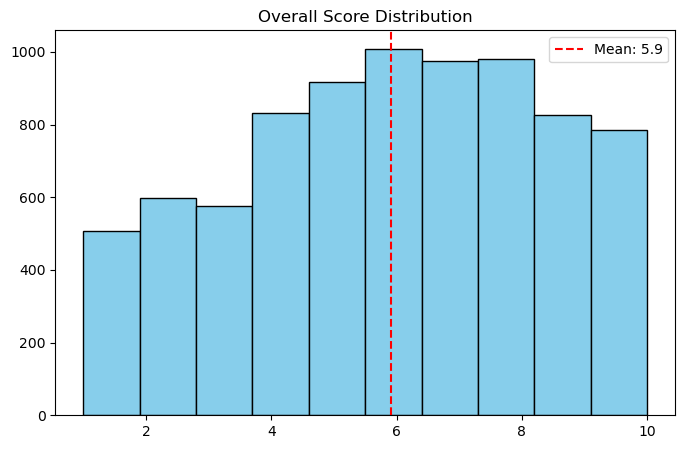

In [22]:
overall_scores = df[parameter_cols].values.flatten()

plt.figure(figsize=(8, 5))
plt.hist(overall_scores, bins=10, color='skyblue', edgecolor='black')
plt.axvline(overall_scores.mean(), color='red', linestyle='--', label=f"Mean: {overall_scores.mean():.1f}")
plt.legend()
plt.title("Overall Score Distribution")
plt.show()


In [24]:
print("🏆 Top 3 Parameters:\n", avg_scores.head(3))
print("\n⚠️ Bottom 3 Parameters:\n", avg_scores.tail(3))


🏆 Top 3 Parameters:
 Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

⚠️ Bottom 3 Parameters:
 Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


In [26]:
def classify(score):
    if score >= 8:
        return 'Positive'
    elif score >= 5:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_summary = {}
for param in parameter_cols:
    sentiment_counts = df[param].apply(classify).value_counts()
    sentiment_summary[param] = sentiment_counts

sentiment_df = pd.DataFrame(sentiment_summary).T.fillna(0)
sentiment_df


,Negative,Neutral,Positive
Well versed with the subject,0.0,489.0,512.0
Explains concepts in an understandable way,323.0,331.0,347.0
Use of presentations,218.0,600.0,183.0
Degree of difficulty of assignments,412.0,294.0,295.0
Solves doubts willingly,400.0,303.0,298.0
Structuring of the course,386.0,297.0,318.0
Provides support for students going above and beyond,387.0,287.0,327.0
Course recommendation based on relevance,388.0,300.0,313.0


In [28]:
overall_avg = df[parameter_cols].mean().mean()
print(f"📢 Overall Average Score: {overall_avg:.2f}/10")
print("✅ Strengths:", list(avg_scores.head(3).index))
print("⚠️ Improvements Needed:", list(avg_scores.tail(3).index))


📢 Overall Average Score: 5.92/10
✅ Strengths: ['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations']
⚠️ Improvements Needed: ['Course recommendation based on relevance', 'Solves doubts willingly', 'Degree of difficulty of assignments']
